<a href="https://colab.research.google.com/github/jkcg-learning/HeartDiseasePrediction_XAI/blob/main/Jyothish_Kumar_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explaining Machine Learning Models using SHAP** (SHapley Additive exPlanations)

https://shap.readthedocs.io/en/latest/



**Heart Disease Prediction**

Predict if a heart disease is present or not

https://dphi.tech/practice/challenge/51

*Data Description*


* age: Age in years
* sex: 1 = male, 0 = female
* cp: Chest pain type
* trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholesterol in mg/dl
* fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* restecg: Resting electrocardiographic results
* thalach: Maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: The slope of the peak exercise ST segment
* ca: Number of major vessels (0-4) colored by fluoroscopy
* thal: 0 = null, 1 = fixed defect found, 2 = blood flow is normal, 3 = reversible defect found
* target: 1 = Heart disease present, 0 = Heart disease not present

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the train data

heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )

In [3]:
print(f'\nTrain contains {heart_data.shape[0]} samples and {heart_data.shape[1]} variables')


Train contains 212 samples and 14 variables


In [4]:
#loading the test data

test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')
print(f'\nTest contains {test_data.shape[0]} samples and {test_data.shape[1]} variables')


Test contains 91 samples and 13 variables


In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


In [6]:

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [7]:
# Checking for missing values

heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
TARGET_COL = 'target'

In [10]:
# Checking for the class imbalance

heart_data[TARGET_COL].value_counts(normalize=True)

1    0.542453
0    0.457547
Name: target, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


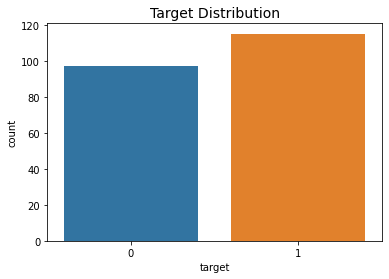

In [11]:
_ = sns.countplot(heart_data[TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

In [12]:
# Checking the unique values of each column
heart_data.nunique()

age          40
sex           2
cp            4
trestbps     46
chol        134
fbs           2
restecg       3
thalach      82
exang         2
oldpeak      36
slope         3
ca            5
thal          4
target        2
dtype: int64

In [13]:
# Separting Categorical Columns

cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [14]:
# Separating numerical Columns

num_cols = ['age','trestbps','chol','thalach','oldpeak']

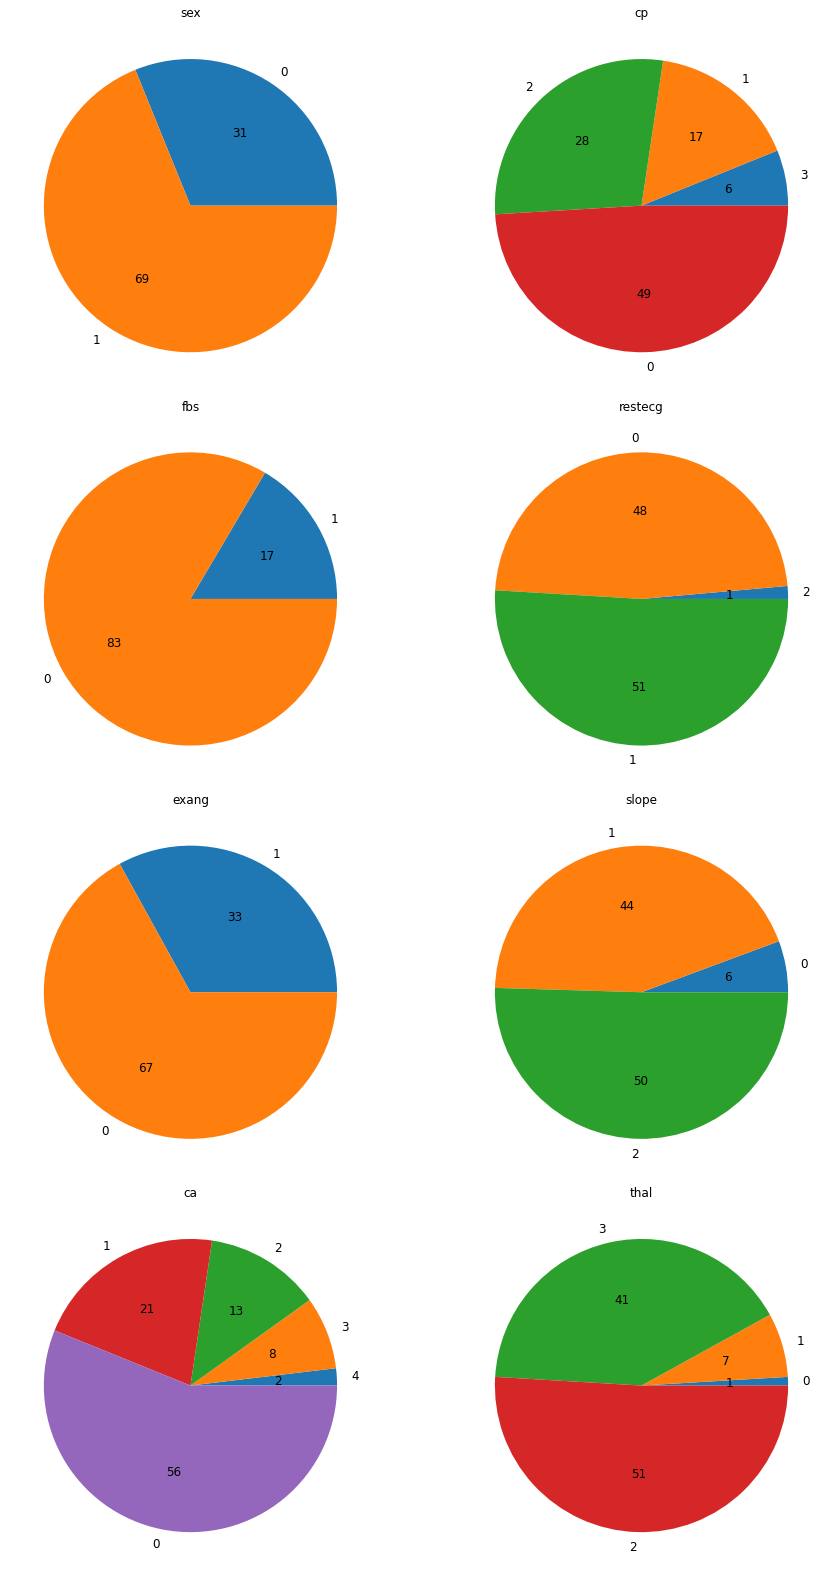

In [15]:
# Plotting the share of each categorical column

fig, axes = plt.subplots(4, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(heart_data[cat_cols]):
    _ = heart_data[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

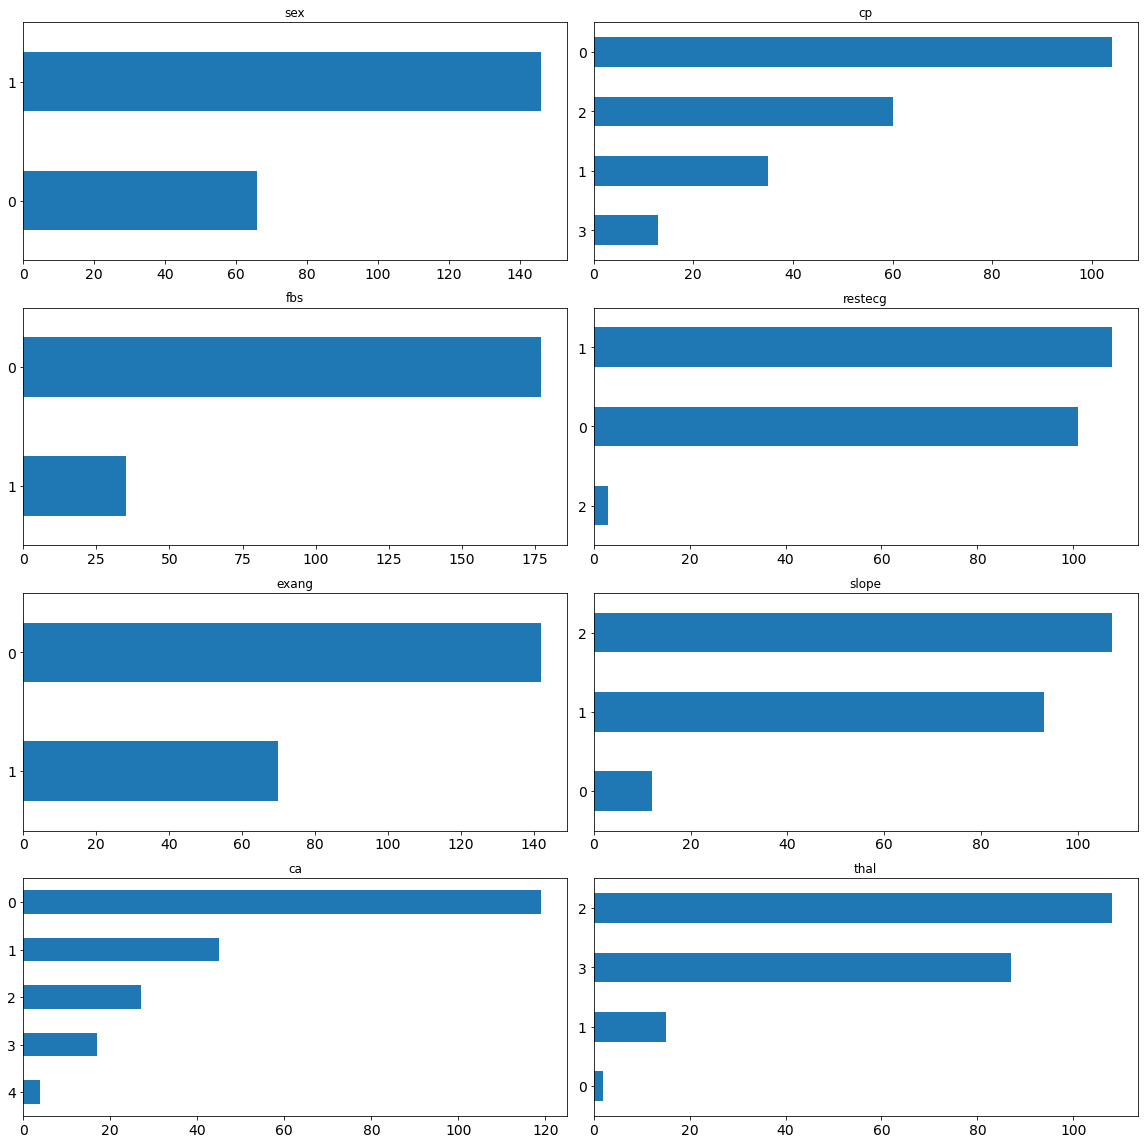

In [16]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(heart_data[cat_cols]):
    _ = heart_data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

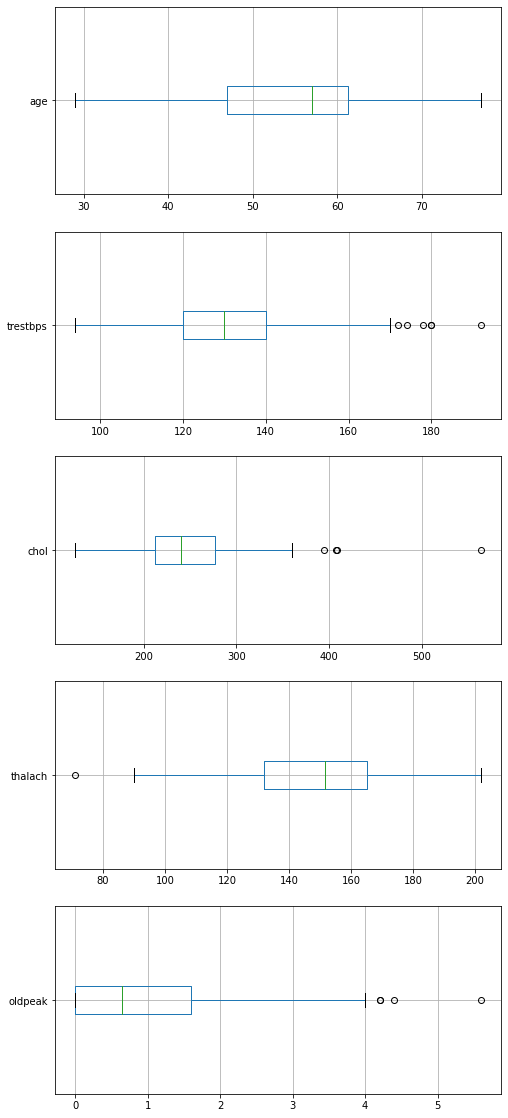

In [17]:
# Distribution of numerical columns

fig, axes = plt.subplots(5, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
  _ = heart_data[[c]].boxplot(ax=axes[i], vert=False)

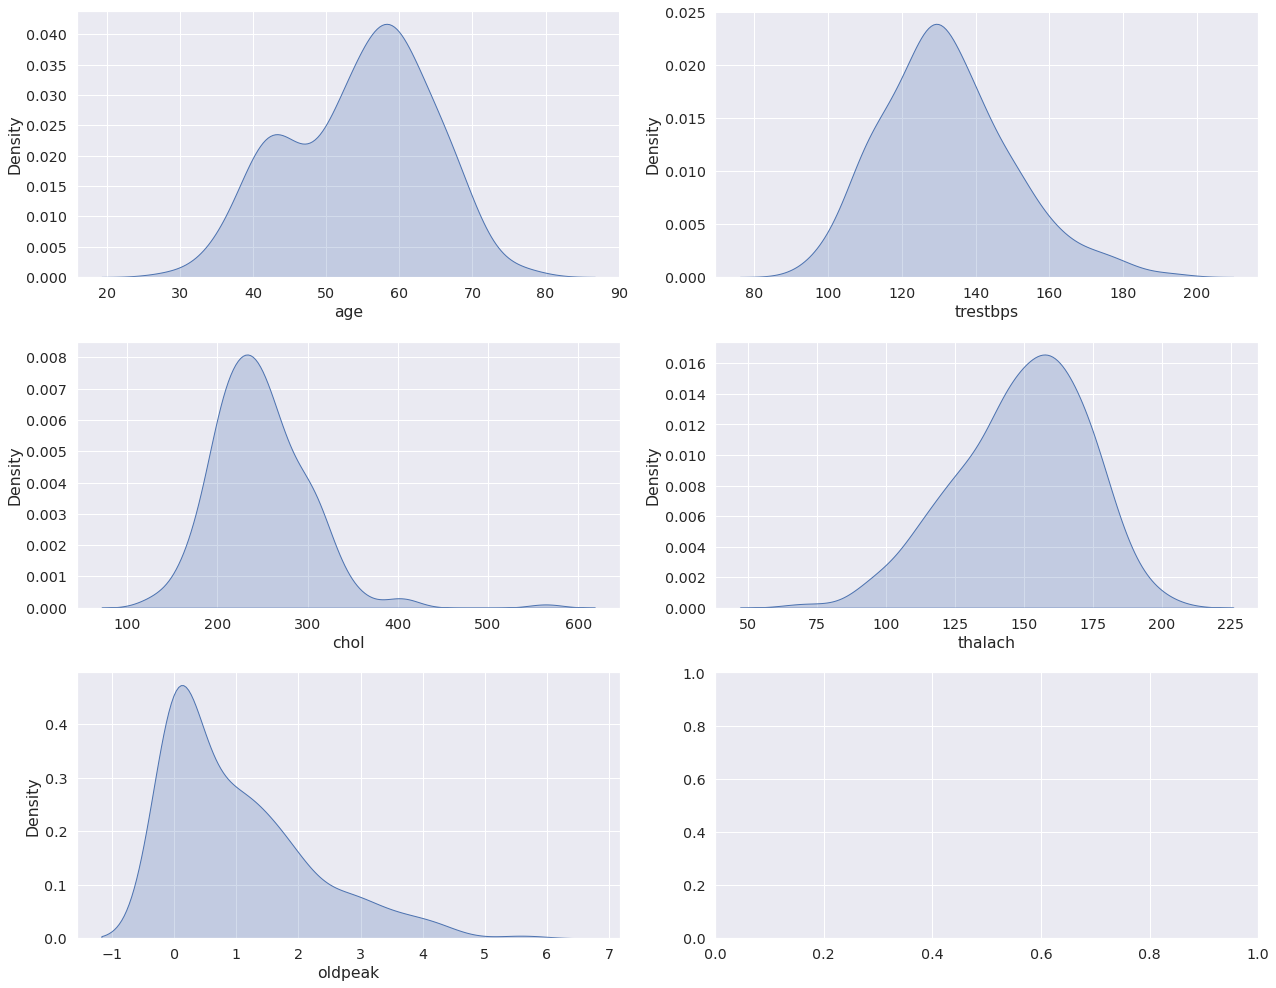

In [18]:

sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=heart_data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

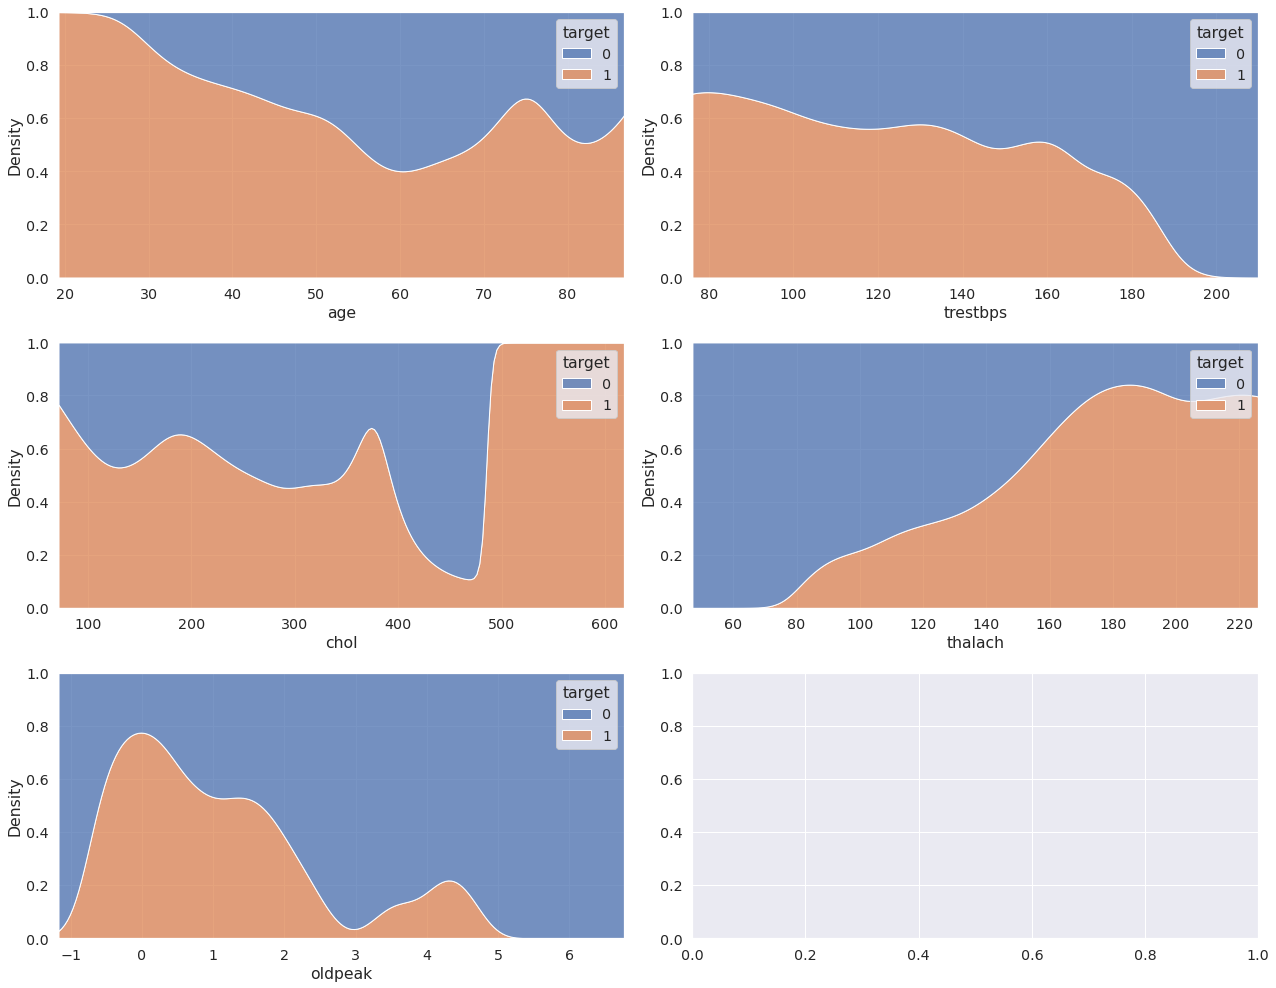

In [19]:

sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=heart_data, x=c, hue=TARGET_COL, multiple='fill', ax=axes[i])
plt.tight_layout()

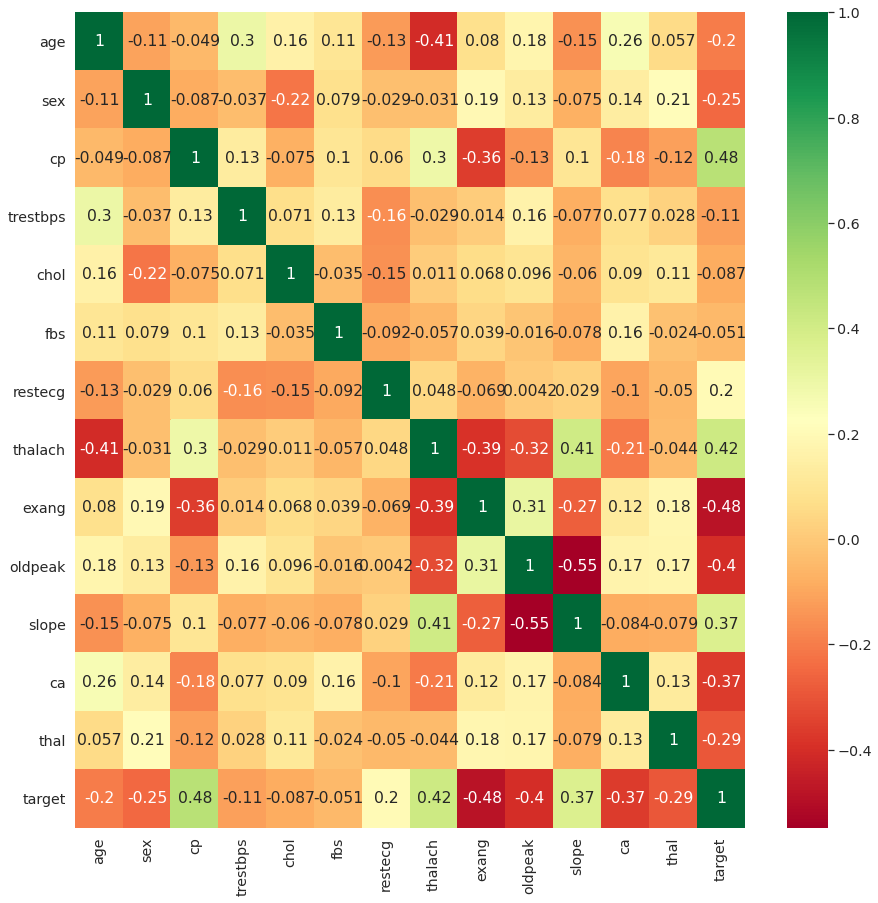

In [20]:
# Plotting the correlation with the target

plt.figure(figsize=(15, 15))
_ = sns.heatmap(heart_data.corr(), annot=True,cmap="RdYlGn")

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
X = heart_data.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,age,37.429280
1,sex,3.764373
2,cp,2.323044
3,trestbps,60.350729
4,chol,25.193698
5,fbs,1.310947
6,restecg,2.084528
7,thalach,46.126242
8,exang,2.032480
9,oldpeak,2.871370


In [27]:
# Merging train and test data set into one dataframe for easy process of one-hot encoding of categorical variables

df = pd.concat([heart_data, test_data], axis=0).reset_index(drop = True)
df.shape

(303, 14)

In [ ]:
df = pd.get_dummies(df, columns = cat_cols)

In [ ]:
# Scaling the numerical features using standard scaler

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df[num_cols] = scaler.fit_transform(df[num_cols])

In [28]:
# Splitting the entire processed data back into train and test

train_proc, test_proc = df[:heart_data.shape[0]], df[heart_data.shape[0]:].reset_index(drop = True)

# marking all columns as features except for the target column (some feature selection algorithm could be used to reduce this further)

features = [c for c in train_proc.columns if c not in [TARGET_COL]]

In [29]:

len(features)

13

In [30]:
train_proc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1.0
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1.0
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0.0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0.0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0.0
208,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1.0
209,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0.0
210,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1.0


In [32]:
test_proc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,0,0,138,243,0,0,152,1,0.0,1,0,2,NaN
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2,NaN
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2,NaN
3,44,0,2,108,141,0,1,175,0,0.6,1,0,2,NaN
4,47,1,2,108,243,0,1,152,0,0.0,2,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,51,1,0,140,261,0,0,186,1,0.0,2,0,2,NaN
87,42,1,3,148,244,0,0,178,0,0.8,2,2,2,NaN
88,56,1,1,120,240,0,1,169,0,0.0,0,0,2,NaN
89,64,0,0,180,325,0,1,154,1,0.0,2,0,2,NaN


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

In [34]:
# Splitting the dataset as train set and validation set

trn, val = train_test_split(train_proc,test_size=0.2, random_state = 0, stratify = train_proc[TARGET_COL])

###### Input to our model will be the features
train_features, validation_features = trn[features], val[features]

###### Output of our model will be the TARGET_COL
train_target, validation_target = trn[TARGET_COL], val[TARGET_COL]

##### Features for the test data that we will be predicting
test_features = test_proc[features]


In [35]:
# Scaling the features using standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
validation_features_scaled = scaler.fit_transform(validation_features)
test_features_scaled = scaler.fit_transform(test_features)

In [36]:
# Implementing Logistic Regression

model_1_lr = LogisticRegression(random_state = 1, max_iter = 100)
_ = model_1_lr.fit(train_features_scaled, train_target)

In [37]:
# Identifying the model intercept and coefficient for each features

print("Model intercept  : ", model_1_lr.intercept_, "\n")
print("Model coefficient: ", model_1_lr.coef_, "\n")

for i in range(len(train_features.columns)):
    print(train_features.columns[i], ": ", model_1_lr.coef_[0][i])

Model intercept  :  [0.07969862] 

Model coefficient:  [[ 0.10079932 -0.47582298  1.08679506 -0.44833132 -0.08182648 -0.01511114
   0.55027331  0.46590648 -0.66304095 -0.43605218  0.45993062 -0.61251067
  -0.66876048]] 

age :  0.10079931911037922
sex :  -0.47582298074835494
cp :  1.086795062966136
trestbps :  -0.4483313167021311
chol :  -0.08182648392439927
fbs :  -0.015111143310757611
restecg :  0.5502733090763294
thalach :  0.4659064825694921
exang :  -0.6630409479152165
oldpeak :  -0.43605217907115795
slope :  0.459930616720338
ca :  -0.6125106735593016
thal :  -0.6687604795405514


In [38]:
# checking the F1 Score on Train and Validation Dataset

preds_train = model_1_lr.predict(train_features_scaled)
preds_val = model_1_lr.predict(validation_features_scaled)

print("F1 Score on Train Data: ",f1_score(train_target, preds_train) )
print("F1 Score on Validation Data: ",f1_score(validation_target, preds_val) )

F1 Score on Train Data:  0.8586387434554974
F1 Score on Validation Data:  0.7916666666666667


In [39]:
# Implementing XGBoost

model_2_XGB = XGBClassifier(n_estimators = 15,
                    max_depth = 6,
                    learning_rate = 0.01,
                    colsample_bytree = 0.05,
                    random_state=0,
                    )

_ = model_2_XGB.fit(train_features_scaled, train_target)


In [40]:
# checking the F1 Score on Train and Validation Dataset

preds_train = model_2_XGB.predict(train_features_scaled)
preds_val = model_2_XGB.predict(validation_features_scaled)

print("F1 Score on Train Data: ",f1_score(train_target, preds_train) )
print("F1 Score on Validation Data: ",f1_score(validation_target, preds_val) )

F1 Score on Train Data:  0.8585858585858587
F1 Score on Validation Data:  0.7843137254901961


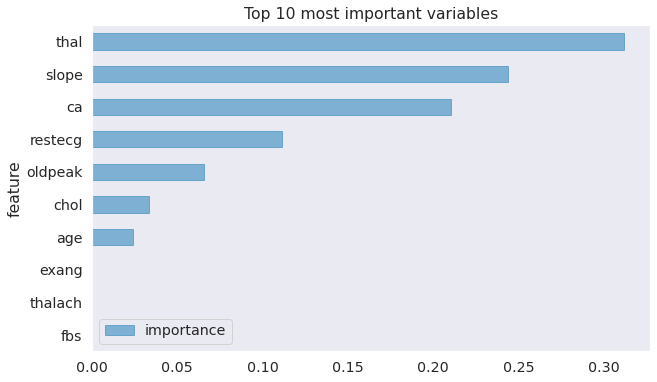

In [41]:
# Plotting the feature importance graph

feature_importances_data = []
features = train_features.columns
for feature_name, feature_importance in zip(features, model_2_XGB.feature_importances_):
    feature_importances_data.append({
        'feature': feature_name,
        'importance': feature_importance
    })

# Plot the results
pd.DataFrame(feature_importances_data)\
    .set_index('feature')\
    .sort_values(by='importance')[-10::]\
    .plot(title='Top 10 most important variables',
          kind='barh',
          figsize=(10, 6),
          color='#348ABD',
          alpha=0.6,
          lw='1',
          edgecolor='#348ABD',
          grid=False,)

In [42]:
# Installing shap

!pip install shap

     |████████████████████████████████| 327kB 5.6MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463914 sha256=d2c7d5a9084627dc0daecae8867d1fc8e8f7ba5a447879b3ac9fb698c0084842
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [43]:
import shap

# Creating a SHAP Linear Explainer for Logistic Regression model (using train_features instead of train_features_scaled to intrepret the actual value)

explainer_lr = shap.LinearExplainer(model_1_lr,train_features)

# finding out the shap values using the explainer
shap_values_lr = explainer_lr.shap_values(validation_features)  ## Calculating the shap values on validation dataset

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer_lr.expected_value)     ## This may vary depending on scaled or normal features

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values_lr,columns=validation_features.columns).head()

Expected Value: -5.385071750441363


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.294334,0.323560,0.163019,-0.130016,0.673432,0.001360,-0.341169,12.905610,0.198912,0.416866,-0.174774,-0.251129,0.200628
1,-0.008064,-0.152263,-0.923776,2.559972,-1.781363,0.001360,-0.341169,-17.378312,-0.464129,-0.542449,-0.174774,-0.251129,-0.468132
2,-1.721652,-0.152263,1.249814,-0.130016,-0.472139,0.001360,0.209104,18.962394,0.198912,-1.109317,-0.634704,0.361381,0.200628
3,0.294334,-0.152263,-0.923776,8.836610,-7.427390,0.001360,0.209104,-1.537491,-0.464129,-0.891291,-0.174774,-0.251129,-0.468132
4,0.193535,-0.152263,1.249814,-0.130016,-0.963098,-0.013751,-0.341169,-2.003398,-0.464129,0.155235,-0.174774,-0.251129,0.869389


In [44]:
# Force plot on validation set - explaing each data point with the influencing parameters.

shap.initjs()
shap.force_plot(explainer_lr.expected_value, shap_values_lr, validation_features)

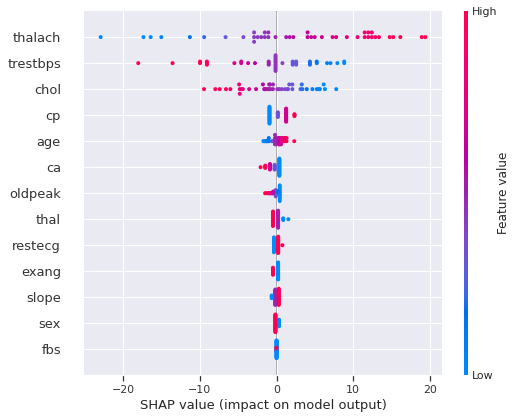

In [45]:
# Summary Plot
shap.initjs()
shap.summary_plot(shap_values_lr, validation_features)

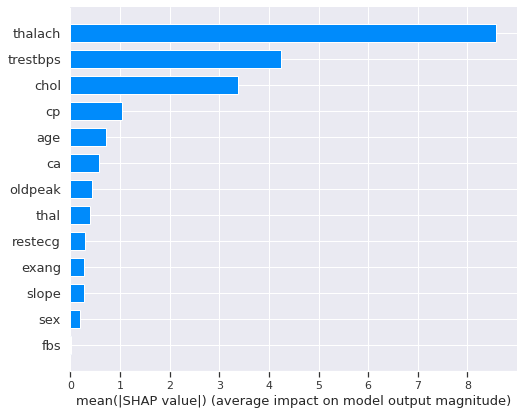

In [46]:
# Summary Plot
shap.initjs()
shap.summary_plot(shap_values_lr, validation_features, plot_type='bar')

In [47]:
# Explaining the individual effect of each features in the second data point of validation dataset

print("Predicted with Heart Disease ? : ",validation_target.iloc[1].astype(int))
shap.initjs()
shap.force_plot(explainer_lr.expected_value, shap_values_lr[1, :], validation_features.iloc[1, :])

Predicted with Heart Disease ? :  0


Here the patient is identified without any Heart Disease, while his trestbps (resting blood pressure) is 124, other factors like thalach (macimum heart rate achieved), chest pain type is decreasing the shapely value to classify the patient without any problem 

In [48]:
# Explaining the individual effect of each features in the third data point of validation dataset

print("Predicted with Heart Disease ? : ",validation_target.iloc[2].astype(int))
shap.initjs()
shap.force_plot(explainer_lr.expected_value, shap_values_lr[2, :], validation_features.iloc[2, :])


Predicted with Heart Disease ? :  1


Here the patient is identified with Heart Disease, with thalach (maximum heart rate achieved), chest pain type to increase the shapely value to classify the patient with a heart disease 

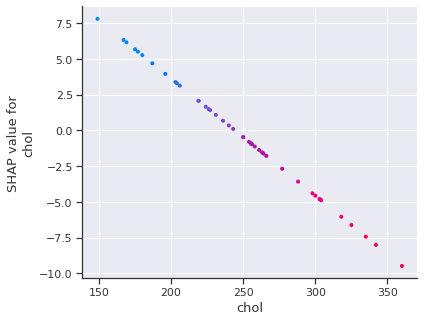

In [49]:
# Partial Dependence plot of chol

shap.dependence_plot(ind='chol', interaction_index='chol',
                     shap_values=shap_values_lr, 
                     features=validation_features,  
                     display_features=validation_features)

The dependence plot is linear and as cholestrol increases shap value decreases

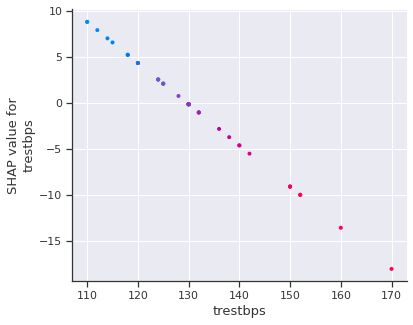

In [50]:
# Partial Dependence plot of trestbps

shap.dependence_plot(ind='trestbps', interaction_index='trestbps',
                     shap_values=shap_values_lr, 
                     features=validation_features,  
                     display_features=validation_features)

The dependence plot is linear and as trestbps increases shap value decreases

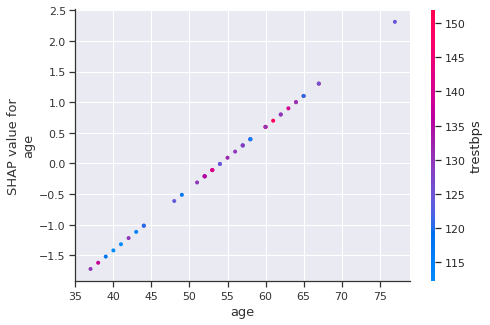

In [51]:
# Partial Dependence plot of age

shap.dependence_plot(ind='age', interaction_index='trestbps',
                     shap_values=shap_values_lr, 
                     features=validation_features,  
                     display_features=validation_features)

The dependence plot is linear and as (age and trestbps) increases shap value increases

In [52]:
# build an normaal explainer and explain the model predictions on the given dataset
explainer = shap.Explainer(model_1_lr, train_features)
shap_values = explainer(validation_features)


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


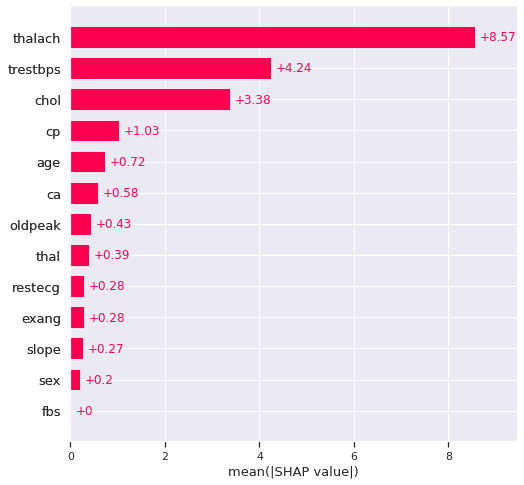

In [53]:
#bar plot

shap.plots.bar(shap_values, max_display=30)

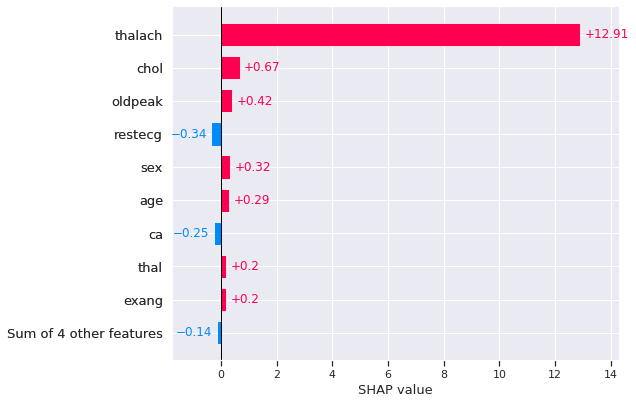

In [54]:
# explaining the influencing factors on the first data point in validation dataset

shap.plots.bar(shap_values[0])

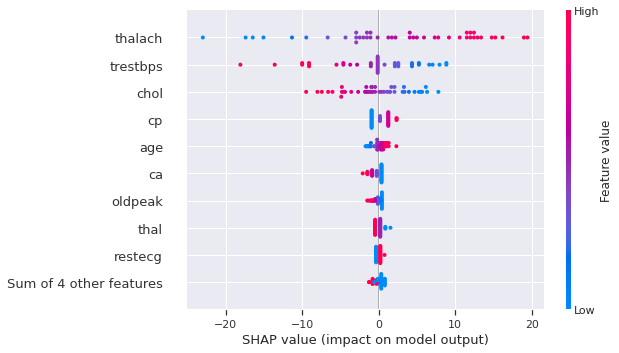

In [55]:
#beeswarm plot

shap.plots.beeswarm(shap_values)

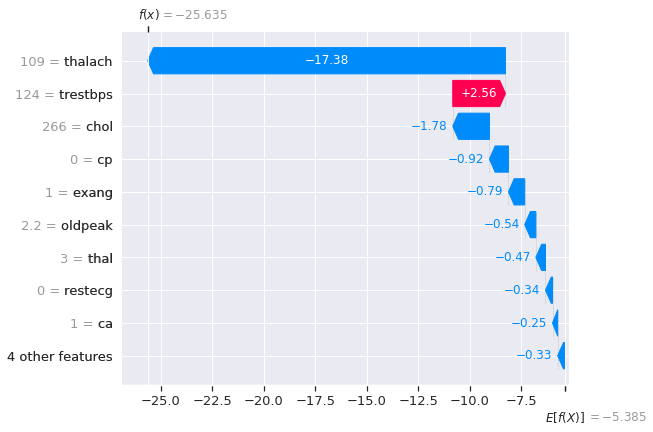

In [56]:
#waterfall plot
shap.plots.waterfall(shap_values[1])

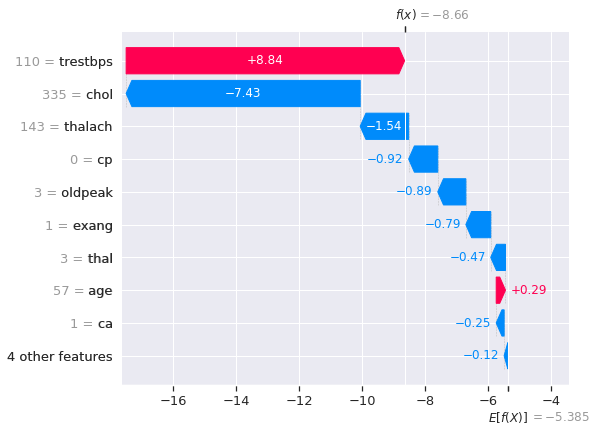

In [57]:
shap.plots.waterfall(shap_values[3])

In [58]:
# Predicting the value on test data based on Logistic regression model

preds_test_model_1 = model_1_lr.predict(test_features_scaled).astype(int)

In [59]:
# Predicting the value on test data based on XGBoost model


preds_test_model_2 = model_2_XGB.predict(test_features_scaled).astype(int)

In [60]:
# creating a submission dataframe and saving it as a file in csv format

submission_data = pd.DataFrame({'prediction':preds_test_model_2})
submission_data.to_csv('submission_12.csv', index = False)